In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Loading the data set
breast_cancer_data = pd.read_csv('/content/drive/MyDrive/breast_cancer_dataset.csv')

In [3]:
#first 5 row of the dataset
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_cancer_data.shape

(569, 33)

In [5]:
#count of different labels
breast_cancer_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [6]:
#load the Label Encoder Function
label_encoder = LabelEncoder()

In [7]:
labels = label_encoder.fit_transform(breast_cancer_data['diagnosis'])

In [8]:
#appending the labels to the dataframe
breast_cancer_data['diagnosis'] = labels

In [9]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
breast_cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [11]:
breast_cancer_data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


0 -> Benign and 1 -> Malignat

In [12]:
breast_cancer_data_zero=breast_cancer_data[breast_cancer_data.diagnosis==0]
breast_cancer_data_one=breast_cancer_data[breast_cancer_data.diagnosis==1]
breast_cancer_data_zero=breast_cancer_data_zero.sample(212)

In [13]:
breast_cancer_data=pd.concat([breast_cancer_data_zero,breast_cancer_data_one],axis=0)

In [14]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 133 to 567
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       424 non-null    int64  
 1   diagnosis                424 non-null    int64  
 2   radius_mean              424 non-null    float64
 3   texture_mean             424 non-null    float64
 4   perimeter_mean           424 non-null    float64
 5   area_mean                424 non-null    float64
 6   smoothness_mean          424 non-null    float64
 7   compactness_mean         424 non-null    float64
 8   concavity_mean           424 non-null    float64
 9   concave points_mean      424 non-null    float64
 10  symmetry_mean            424 non-null    float64
 11  fractal_dimension_mean   424 non-null    float64
 12  radius_se                424 non-null    float64
 13  texture_se               424 non-null    float64
 14  perimeter_se             424 

In [15]:
breast_cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [16]:
# Fill the missing values with the mean of each column
breast_cancer_data.drop('Unnamed: 32', axis=1, inplace=True)
breast_cancer_data.drop('id', axis=1, inplace=True)

In [17]:
breast_cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.500000,14.813257,19.621675,96.770142,721.346698,0.097482,0.112413,0.103305,0.056737,0.183575,...,17.262840,26.246509,114.224175,990.863679,0.134596,0.278392,0.308621,0.128236,0.297412,0.085473
std,0.500591,3.707083,4.236046,25.580378,377.748166,0.014225,0.055769,0.083510,0.040992,0.027366,...,5.104075,6.082353,35.488111,614.500327,0.023481,0.169004,0.218973,0.068159,0.066284,0.019305
min,0.000000,6.981000,10.380000,43.790000,143.500000,0.052630,0.026750,0.000000,0.000000,0.120300,...,7.930000,12.870000,50.410000,185.200000,0.084090,0.046190,0.000000,0.000000,0.156500,0.055040
25%,0.000000,12.037500,16.620000,77.540000,445.275000,0.087325,0.068255,0.035520,0.023688,0.164025,...,13.337500,21.835000,86.692500,546.600000,0.118250,0.157150,0.142025,0.073603,0.252100,0.071843
50%,0.500000,13.970000,19.300000,90.795000,602.650000,0.097220,0.105450,0.086975,0.048405,0.181250,...,15.970000,25.920000,105.850000,780.550000,0.134900,0.238400,0.276850,0.122300,0.287150,0.080595
75%,1.000000,17.312500,22.047500,114.200000,931.450000,0.106300,0.143650,0.152550,0.086260,0.197975,...,20.585000,30.382500,137.950000,1302.500000,0.149550,0.373500,0.429650,0.182000,0.324650,0.094815
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
X = breast_cancer_data.drop(columns="diagnosis",axis=1)
Y = breast_cancer_data['diagnosis']

In [19]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
133       15.710         13.93          102.00      761.7          0.09462   
381       11.040         14.93           70.67      372.7          0.07987   
151        8.219         20.70           53.27      203.9          0.09405   
270       14.290         16.82           90.30      632.6          0.06429   
179       12.810         13.06           81.29      508.8          0.08739   
..           ...           ...             ...        ...              ...   
563       20.920         25.09          143.00     1347.0          0.10990   
564       21.560         22.39          142.00     1479.0          0.11100   
565       20.130         28.25          131.20     1261.0          0.09780   
566       16.600         28.08          108.30      858.1          0.08455   
567       20.600         29.33          140.10     1265.0          0.11780   

     compactness_mean  concavity_mean  concave points_mean  sym

In [20]:
print(Y)

133    0
381    0
151    0
270    0
179    0
      ..
563    1
564    1
565    1
566    1
567    1
Name: diagnosis, Length: 424, dtype: int64


In [21]:
#Splitting the data into training data & Testing data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 42)

In [22]:
print( X.shape , X_train.shape , X_test.shape)

(424, 30) (339, 30) (85, 30)


In [23]:
#Data standarlization
scaler = StandardScaler()

In [24]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
#Model Training
#SVM
classfiier = svm.SVC(kernel = 'linear')

In [26]:
# Training the support vector machine
classfiier.fit(X_train_scaled , Y_train)

SVC(kernel='linear')

In [27]:
# model evalution
#Accuracy score
X_train_prediction = classfiier.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [28]:
print('Accuracy score of the training data : ' , training_data_accuracy)

Accuracy score of the training data :  0.9911504424778761


In [29]:
X_test_prediction = classfiier.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [30]:
print('Accuracy score of the test data : ' , test_data_accuracy)

Accuracy score of the test data :  0.9529411764705882


In [31]:
# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)
print("",classification_report(Y_test,X_test_prediction))

[[41  2]
 [ 2 40]]
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.95      0.95      0.95        42

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



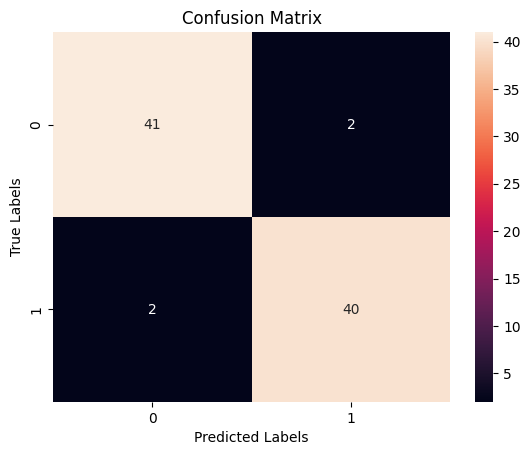

In [32]:
# Heatmap Visualization
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [33]:
cancer = classfiier.predict(X_test_scaled)

In [34]:
print(classification_report(Y_test,cancer))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.95      0.95      0.95        42

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85



In [35]:
# building the prediction system
input_data = (7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039)
#Changing input_data  to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classfiier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('Cancer detected')
else:
  print('Cancer not detected')

[[7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02 4.362e-02 0.000e+00
  0.000e+00 1.587e-01 5.884e-02 3.857e-01 1.428e+00 2.548e+00 1.915e+01
  7.189e-03 4.660e-03 0.000e+00 0.000e+00 2.676e-02 2.783e-03 9.456e+00
  3.037e+01 5.916e+01 2.686e+02 8.996e-02 6.444e-02 0.000e+00 0.000e+00
  2.871e-01 7.039e-02]]
[[-1.92831795  1.23839497 -1.93375633 -1.44768727 -3.07620347 -1.20863378
  -1.23459356 -1.39412785 -0.89664218 -0.50462854 -0.21081924  0.39854993
  -0.28689425 -0.53726758  0.07208353 -1.22645543 -1.22745594 -1.99890665
   0.71086668 -0.41884353 -1.5701803   0.73810239 -1.58585355 -1.21018175
  -1.87043628 -1.2539218  -1.40462957 -1.90653157 -0.12174617 -0.74071196]]
[0]
Cancer not detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
